In [57]:
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np
import datetime
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import ScalarFormatter

import h5py
import datetime as dt

In [233]:
FILE_NAME = 'MLS-Aura_L2GP-H2O_v04-23-c01_2019d202.he5'
file = h5py.File(FILE_NAME, 'r')

In [234]:
dset = file['HDFEOS']['SWATHS']['H2O']['Data Fields']['H2O']
data_h2o = dset[:, :]

dset = file['HDFEOS']['SWATHS']['H2O']['Geolocation Fields']['Latitude']
data_lat = dset[:]
dset = file['HDFEOS']['SWATHS']['H2O']['Geolocation Fields']['Longitude']
data_lon = dset[:]
dset = file['HDFEOS']['SWATHS']['H2O']['Geolocation Fields']['Pressure']
data_pres = dset[:]
dset = file['HDFEOS']['SWATHS']['H2O']['Geolocation Fields']['Time']
data_time = FILE_NAME
dt_ = datetime.datetime.strptime(data_time[29:33]+"0101", '%Y%m%d') + datetime.timedelta(days=int(data_time[34:37])) - datetime.timedelta(days=1)
data_h2o[data_h2o==-999.99] = np.nan
data_h2o[data_lat==-999.99] = np.nan
data_h2o[data_lon==-999.99] = np.nan
#data_h2o[data_pres==-999.99] = np.nan

In [235]:
print(data_lat.shape, data_lon.shape, data_pres.shape)

(3495,) (3495,) (55,)


In [236]:
grid_x, grid_y = np.mgrid[-180:180:2.5, -82:82:2.5]

In [250]:
points = np.random.rand(data_lat.shape[0], 2)
points[:,0] = data_lon[:]
points[:,1] = data_lat[:]
values = data_h2o[:,6] 

values[values ==-999.99] = np.nan

In [251]:
from scipy.interpolate import griddata
grid_z0 = griddata(points, values, (grid_x, grid_y), method='nearest')*1e6
grid_z1 = griddata(points, values, (grid_x, grid_y), method='linear')*1e6
grid_z2 = griddata(points, values, (grid_x, grid_y), method='cubic')*1e6

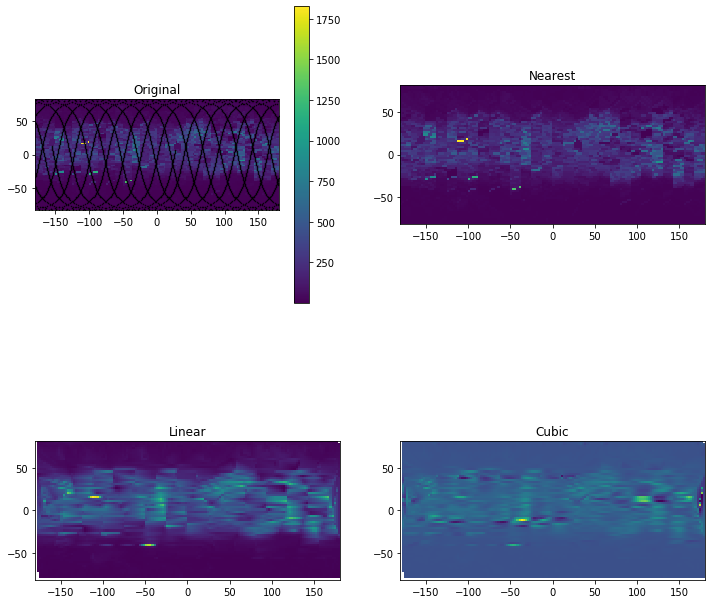

In [252]:
import matplotlib.pyplot as plt
plt.subplot(221)
plt.imshow(grid_z0.T, extent=(-180,180,-82,82), origin='lower')
plt.plot(points[:,0], points[:,1], 'k.', ms=1)
plt.title('Original')
plt.colorbar()
plt.subplot(222)
plt.imshow(grid_z0.T, extent=(-180,180,-82,82), origin='lower')
plt.title('Nearest')
plt.subplot(223)
plt.imshow(grid_z1.T, extent=(-180,180,-82,82), origin='lower')
plt.title('Linear')
plt.subplot(224)
plt.imshow(grid_z2.T, extent=(-180,180,-82,82), origin='lower')
plt.title('Cubic')
plt.gcf().set_size_inches(12, 12)

plt.show()

In [179]:
file['HDFEOS']['SWATHS']['H2O']['Data Fields']['H2O'].attrs['_FillValue']

array([-999.99], dtype=float32)

In [191]:
file['HDFEOS']['SWATHS']['H2O']['Data Fields']['H2O'].attrs['MissingValue'][0]

-999.99

In [201]:
file['HDFEOS']['SWATHS']['H2O']['Geolocation Fields']['Latitude'].attrs['_FillValue']

array([-999.99], dtype=float32)

In [222]:
file['HDFEOS']['SWATHS']['H2O']['Geolocation Fields']['Pressure'].attrs['_FillValue']

array([-999.99], dtype=float32)

In [253]:
data_pres[6]

316.22775

In [218]:
np.sum(values<0)

0

In [220]:
np.sum(grid_z0<0)

0